# Customer Segmentation

**OVERVIEW**

Customer segmentation divides customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

**Business Problem**
The manager of a grocery firm wants to understand the spending behavior of its customers,and divide them into segments to optimize the significance of each customer to the business.

**GOALS**
By the end of this case study, we will be able to figure out the following;
1. Segment customers using a machine learning algorithm (KMeans Clustering) in Python.
2. Who are your target customers with whom you can start your marketing strategy?

**DATA**
The data contains the information of customers from a grocery firm's database.

An in-depth examination of a company's ideal clients is called a customer personality study. It makes it simpler for businesses to adapt their products to the unique wants, behaviors, and concerns of various consumer types. It also helps businesses better understand their clients.

Consumer personality analysis assists a corporation in tailoring its offering to its target market from various customer categories. For instance, a company can assess which customer segment is most likely to purchase the product and then market the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the company's database.

Attributes


**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

 **Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

# Contents 
1. [Importing Libraries](#Importing-Libraries)
2. [Loading Data](#Loading-Data)
3. [Exploration of data](#Assessing-Data)
4. [Data Cleaning](#Data-Cleaning)
5. [Feature Engineering](#Feature-Engineering)
6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
7. [Data Preprocessing](#Data-Preeprocessing)
8. [Dimensionality Reduction](#Dimensionality-Reduction)
4. [Clustering using K-Means](#Clustering)
5. [Cluster Analysis](#Cluster-Analysis).
6. [Conclusion](#Conclusion).

# Importing-Libraries 

In [88]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from datetime import date

from sklearn.cluster import KMeans
import warnings
import os
py.offline.init_notebook_mode(connected = True)

import matplotlib.style as style

import datetime
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings

sns.set_style('whitegrid')
style.use('fivethirtyeight')

pd.reset_option('display.max_rows', None)

warnings.filterwarnings("ignore")

import plotly.express as px
from dash import Input, Output, dcc, html
from jupyter_dash import JupyterDash
from scipy.stats.mstats import trimmed_var
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


ImportError: cannot import name 'escape' from 'jinja2' (C:\Users\s.osarfo\AppData\Roaming\Python\Python39\site-packages\jinja2\__init__.py)

In [89]:
from markupsafe import escape


In [90]:
app = JupyterDash(__name__)

NameError: name 'JupyterDash' is not defined

# Loading-Data 

In [2]:
#reading data 
data=pd.read_csv('grocery.csv', sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#making a copy of the original data 
make_copy=data.copy()

# Assessing-Data

In [4]:
#getting a consice summary of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. The Dt_Customer column should not be an object datatype. It will be changed to the correct datatype, datetime 



In [5]:
#descriptive statistics of numerical variables 
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [6]:
#checking for missing values 
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The Income column contains missing values. I will fill this with the median Income 

In [7]:
#descriptive statistics of categorical variables 
data.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

# Data-Cleaning

In [8]:
#convert datatype of dt_customer from object to datetime 
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

In [9]:
#filing the missing values in the income column with the medain income 
data['Income'] = data['Income'].fillna(data['Income'].median())


In [10]:
#having a look at the consice summary to see if our changes has been effected 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
#Renaming columns for more Clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [12]:
#Unique values in each categorical column
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Education : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [13]:
#descriptive statistics 
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency        Wines       Fruits         Meat         Fish  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     49.109375   303.935714    26.302232   166.950000    37.525446  ...   
std      28.962453   336.597393    39.773434   225.715373    54.628979  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      24.000000    23.750000     1.000000    16.000000     3.000000  ...   
50%      49.000000   173.500000     8.000000    67.000000    12.000000  ...   
75%      74.000000   504.250000    33.000000   232.000000    50.000000  ...   
max      99.000000  1493.000000   199.000000  1725.000000   259.000000  ...   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 26 columns]

# Feature-Engineering

In [14]:
#creating a new feature to get how old each person is 
data['Age'] = 2022-data['Year_Birth']

#creating Feature indicating total number of children in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature pertaining parenthood
data["Parent"] = np.where(data['Children']> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Masters"})

#grouping customers into single or parter category
data["Status"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#finding number of days since person became a customer
data['Customer_In'] = pd.Timestamp.now().normalize() - (data['Dt_Customer'])
#data["Customer_For"]= (datetime.now()-data["Dt_Customer"]).dt.days


#Total amount spent on items 
data["Expenses"] = data["Wines"]+ data["Fruits"]+ data["Meat"]+ data["Fish"]+data["Sweets"]+ data["Gold"]

#finding total number of purchases of customer
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

#Creating a feature to get a sum of accepted promotions 
data["Promotions"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.

In [15]:
#dropping uneeded colims
drop_cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(drop_cols, axis=1)

# Exploratory-Data-Analysis

In [16]:
#having a look at the descriptive statistics of the data after feature engineering
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52237.975446     0.444196     0.506250    49.109375   303.935714   
std     25037.955891     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       AcceptedCmp2     Complain     Response          Age     Children  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean       0.013393     0.009375     0.149107    53.194196     0.950446   
std        0.114976     0.096391     0.356274    11.984069     0.751803   
min        0.000000     0.000000     0.000000    26.000000     0.000000   
25%        0.000000     0.000000     0.000000    45.000000     0.000000   
50%        0.000000     0.000000     0.000000    52.000000     1.000000   
75%        0.000000     0.000000     0.000000    63.000000     1.000000   
max        1.000000     1.000000     1.000000   129.000000     3.000000   

            Parent                   Customer_In     Expenses    Purchases  \
count  2240.000000                          2240  2240.000000  2240.000000   
mean      0.715179  3389 days 01:02:21.428571456   605.798214    14.862054   
std       0.451430   232 days 05:31:02.717688372   602.249288     7.677173   
min       0.000000            2877 days 00:00:00     5.000000     0.000000   
25%       0.000000            3217 days 18:00:00    68.750000     8.000000   
50%       1.000000            3390 days 00:00:00   396.000000    15.000000   
75%       1.000000            3562 days 06:00:00  1045.500000    21.000000   
max       1.000000            3940 days 00:00:00  2525.000000    44.000000   

        Promotions  
count  2240.000000  
mean      0.297768  
std       0.678381  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       4.000000  

[8 rows x 29 columns]

From the descriptive statistics, there is an outlier in the age column, 129 years. I will set a cut off age of 90 years to take off all customers over the age of 85 and with income over 3000000

**Univariate Analysis**

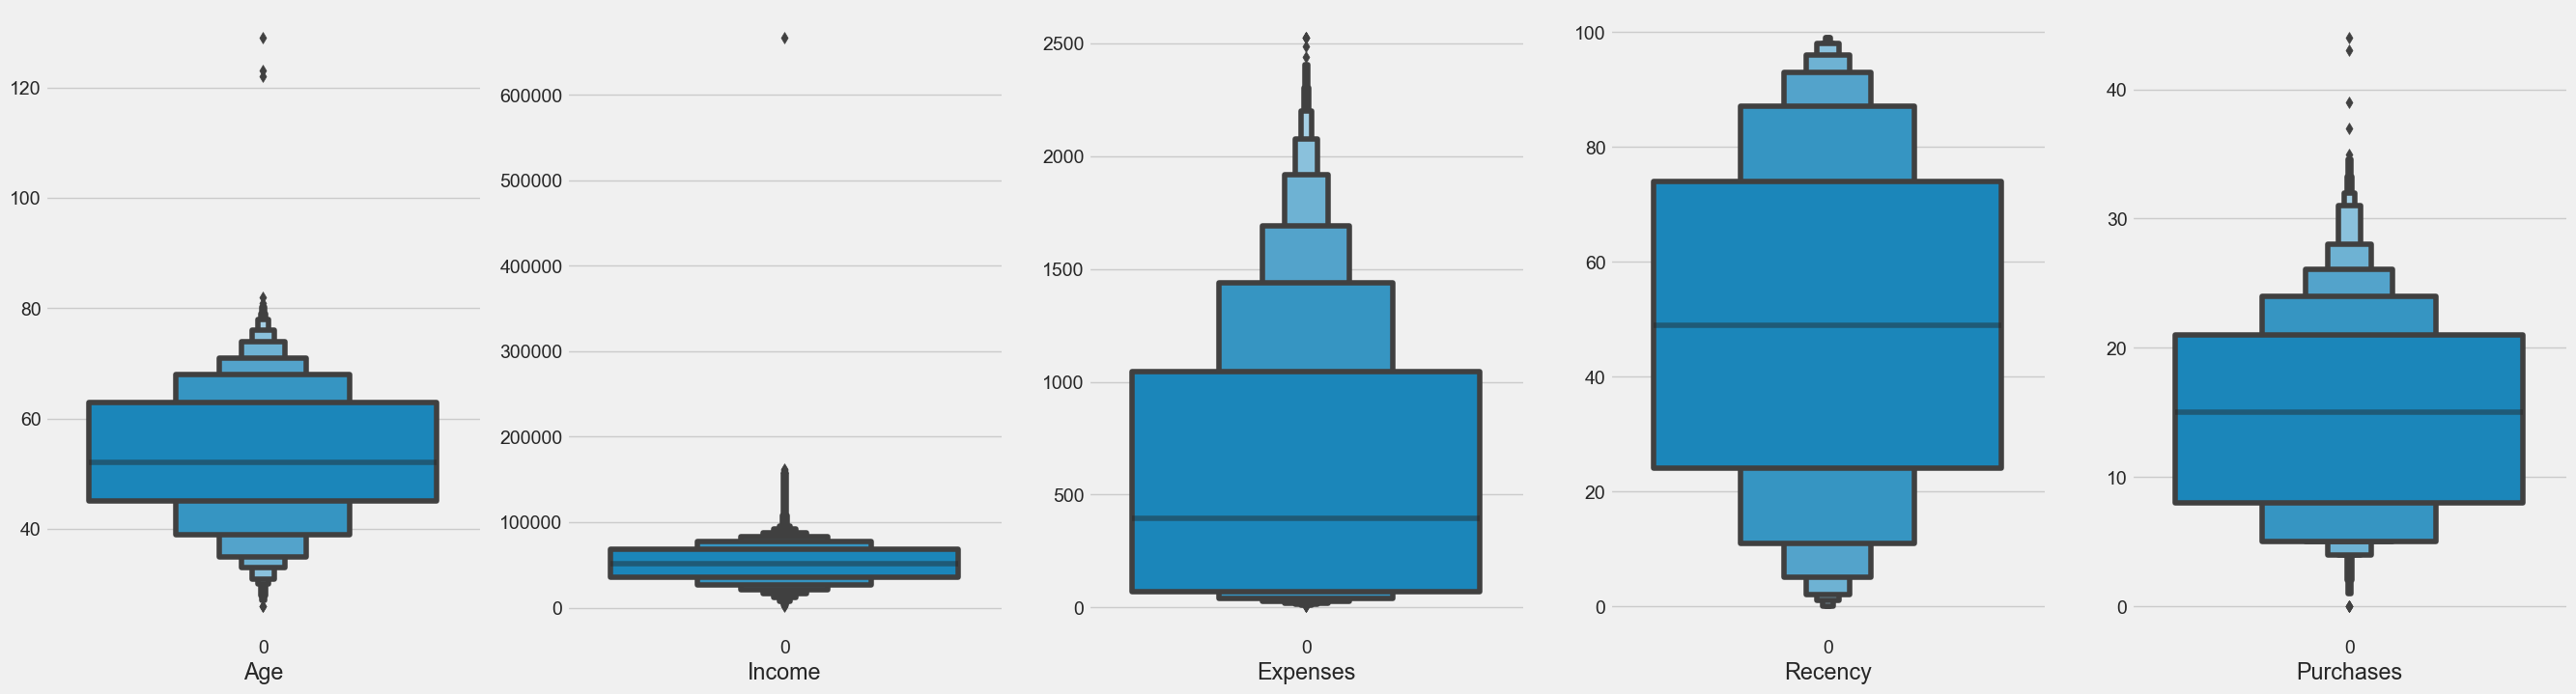

In [17]:
# #examine the boxplots of different features
features= ["Age", "Income", "Expenses", "Recency", 'Purchases']

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
    sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
    
                ).set(xlabel=features[i])
    sns.despine()

In [18]:
#taking off outliers from the income and age columns 
data= data.drop(data[(data["Age"]>90) | (data["Income"]>300000)].index)

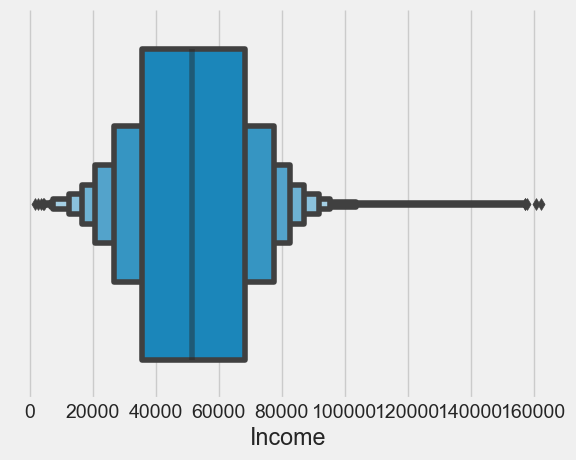

In [19]:
#checking if the changes has been effected 
ax=sns.boxenplot(data['Income'], showfliers=True)
sns.despine()

In [20]:
#selecting only numerical variables 
num=data.select_dtypes(include='object')
num.columns

Index(['Education', 'Status'], dtype='object')

In [21]:
#creating a total nummber of records in the data
total=len(data)

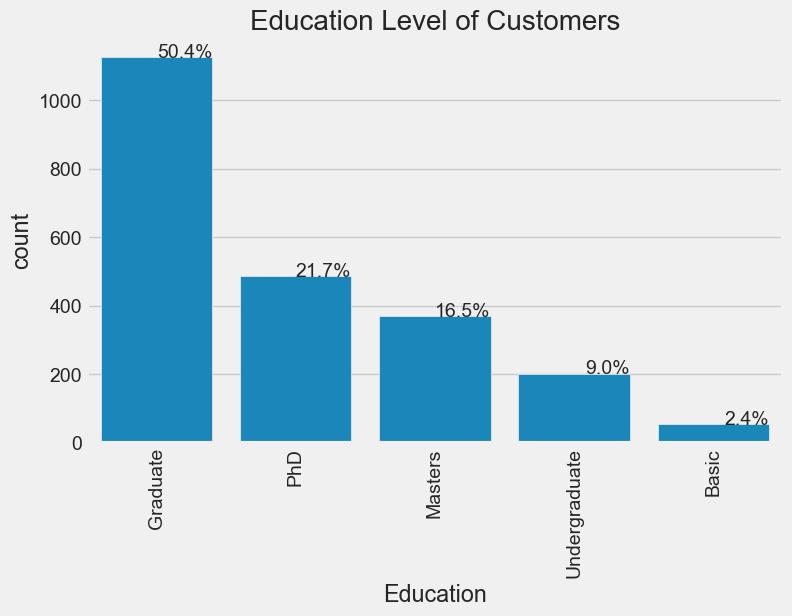

In [22]:
#level of education of customers
plt.figure(figsize=(8,5))
order=data['Education'].value_counts().index
ax = sns.countplot(x="Education", data=data, order=order, color = sns.color_palette()[0])
plt.title('Education Level of Customers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)
plt.show()

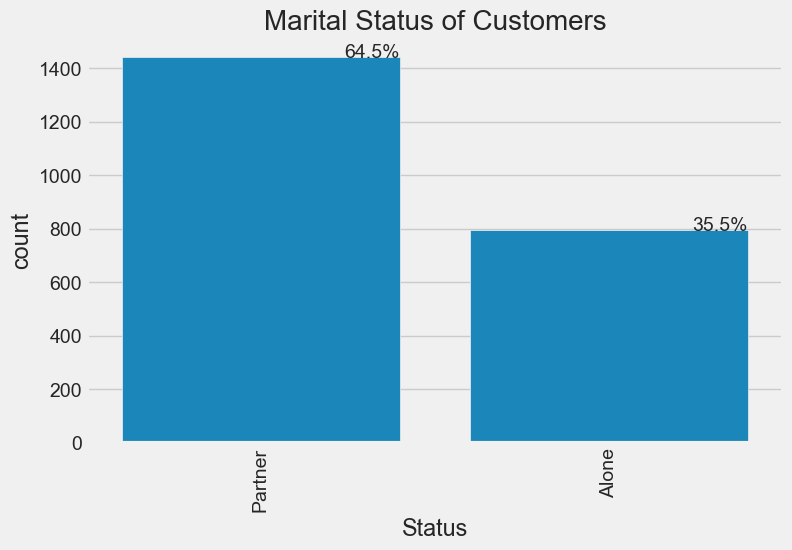

In [23]:
#parners and singlr parents in the data
#level of education of customers
plt.figure(figsize=(8,5))
order=data['Status'].value_counts().index
ax = sns.countplot(x="Status", data=data, order=order, color = sns.color_palette()[0])
plt.title('Marital Status of Customers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)
plt.show()

**Bivariate Analysis**

In [24]:
#selecting only numerical variables
numerical=data.select_dtypes(include=np.number)
numerical.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children', 'Parent',
       'Customer_In', 'Expenses', 'Purchases', 'Promotions'],
      dtype='object')

In [25]:
num=data[['Income', 'Kidhome', 'Teenhome', 'Recency',  'NumWebVisitsMonth',
        'AcceptedCmp1','Complain', 'Response', 'Age', 'Children', 'Parent',
       'Customer_In', 'Expenses', 'Purchases', 'Promotions']]

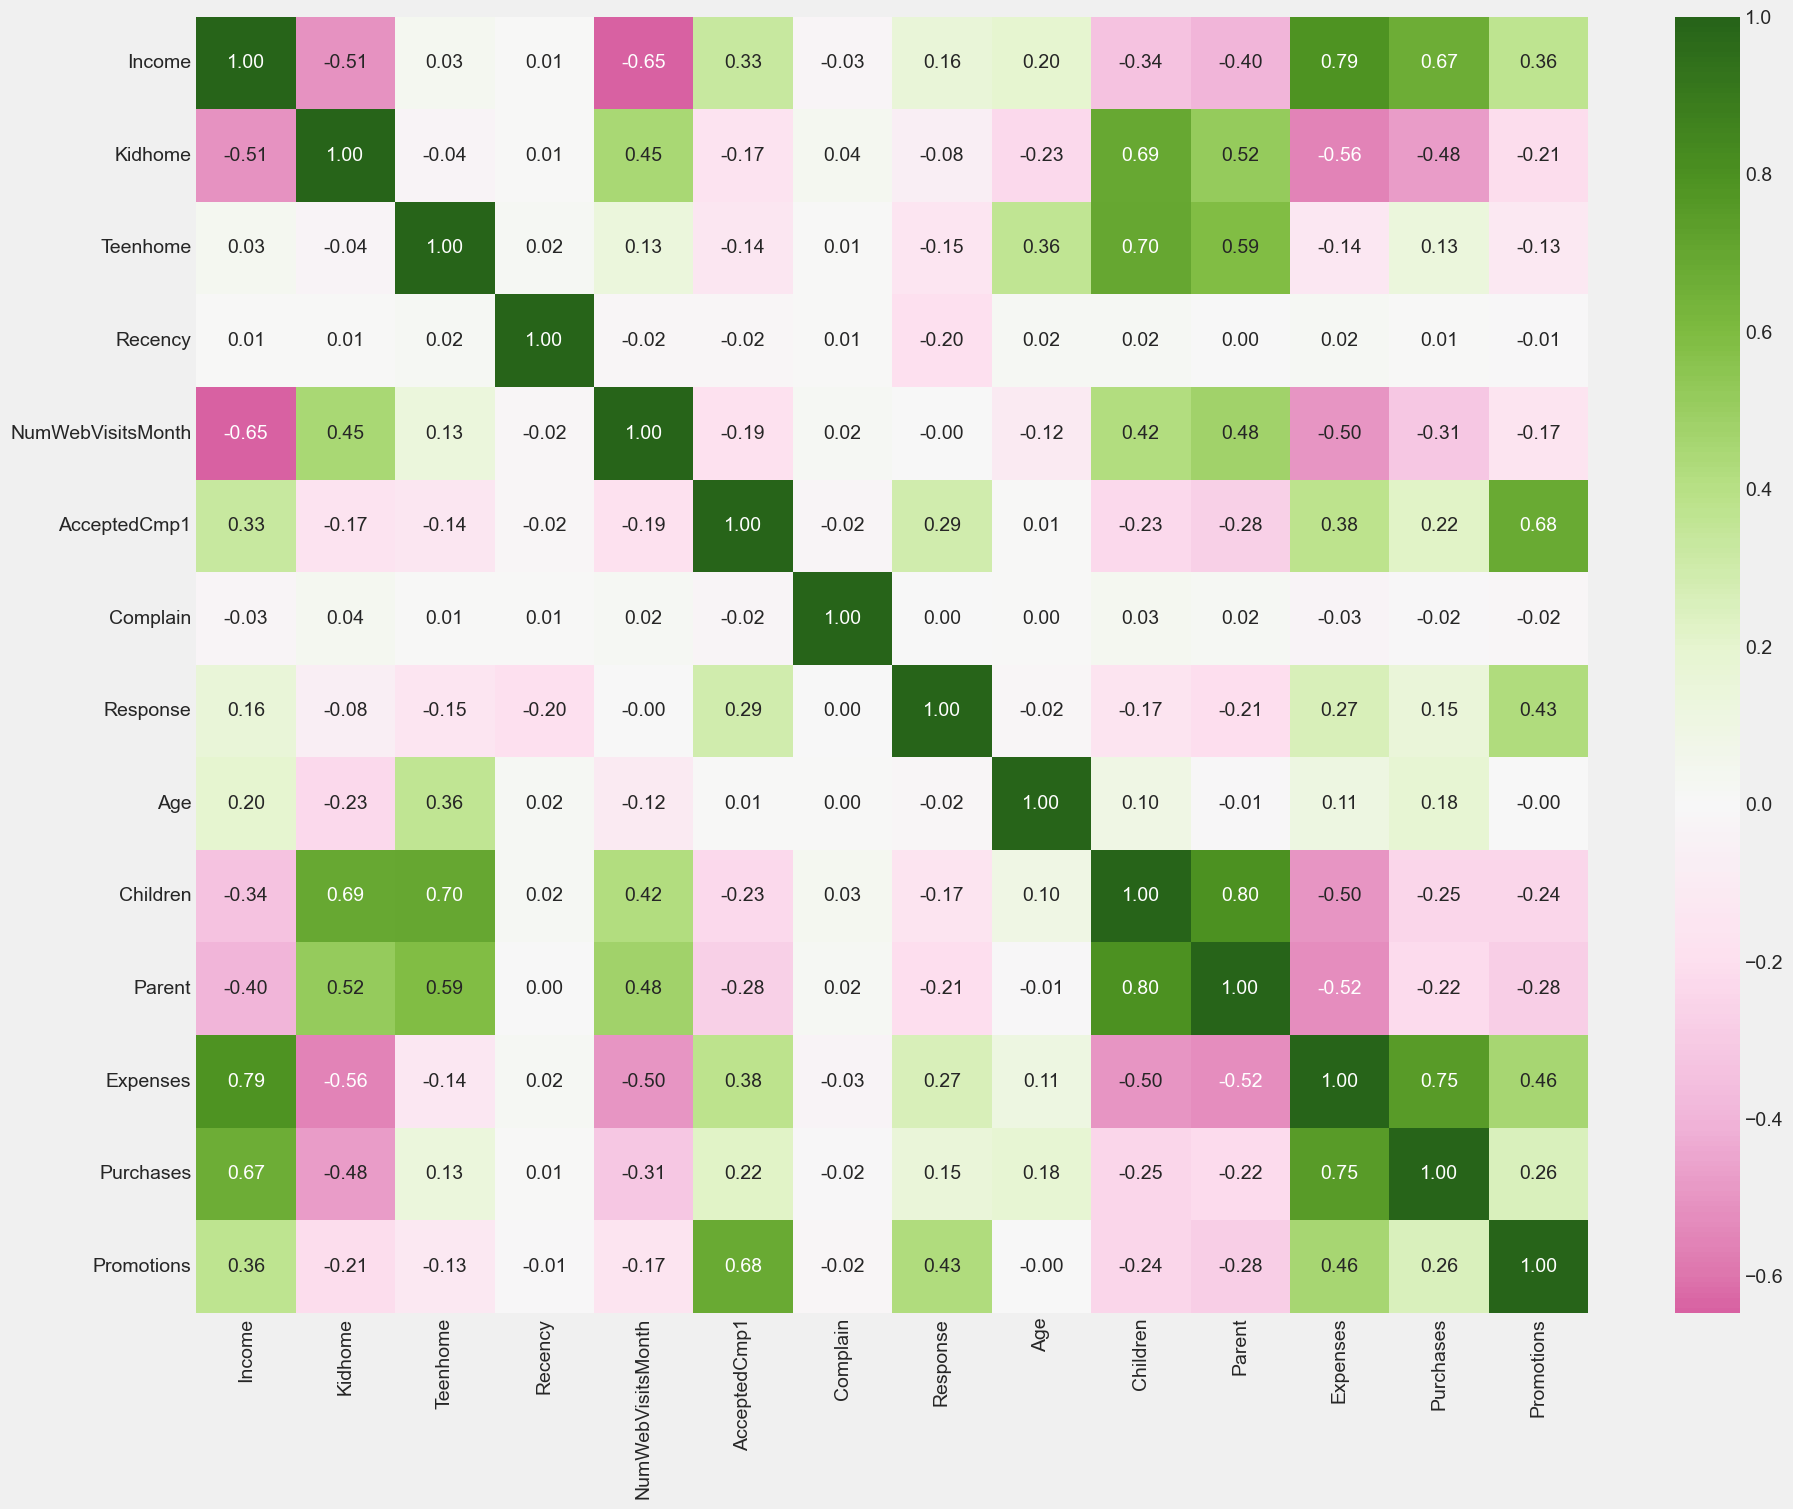

In [26]:
#heatmap to check the relationship between numerical variables

corrmat= num.corr()
plt.figure(figsize=(20,16))  
sns.heatmap(corrmat,annot=True, cmap="PiYG", center=0, fmt = '.2f');

In [27]:
#selecting categorical variables
categorical=data.select_dtypes(include='object')

In [28]:
#writing a function to visualize the realtionship between qualitative and quantitative variables
def compare_qual_quan(data, x, y):
    
    """ This functions plots a box plot to visualize how a qualitative 
     variable relates with a quantitative variable
    """
    plt.figure(figsize=[16,6])
    #plt.title('Relationship Between {} and {} '.format(x, y))
    sns.boxplot(data[x], data[y])
    plt.xticks(rotation=90)
    

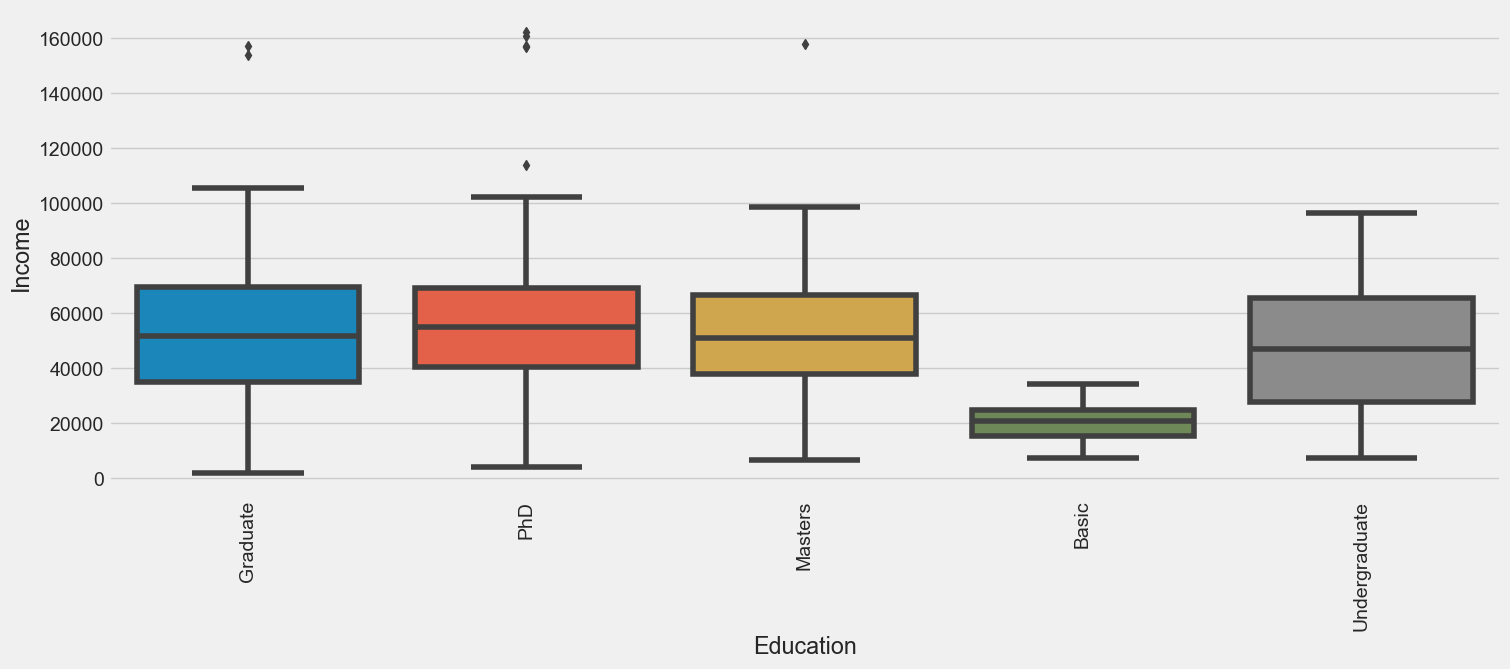

In [29]:
#relationship between Loan status of applicants and Debt to income ratio
compare_qual_quan(data, 'Education', 'Income')

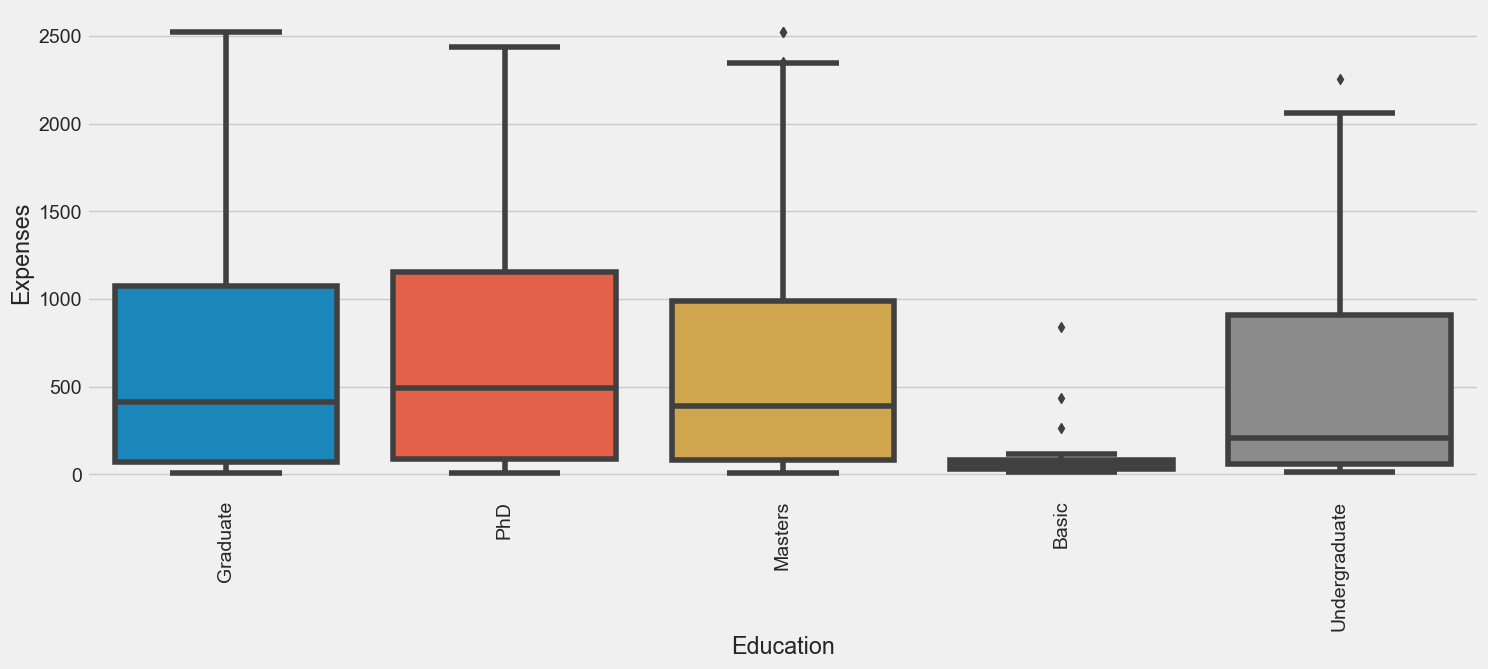

In [30]:
compare_qual_quan(data, 'Education', 'Expenses')

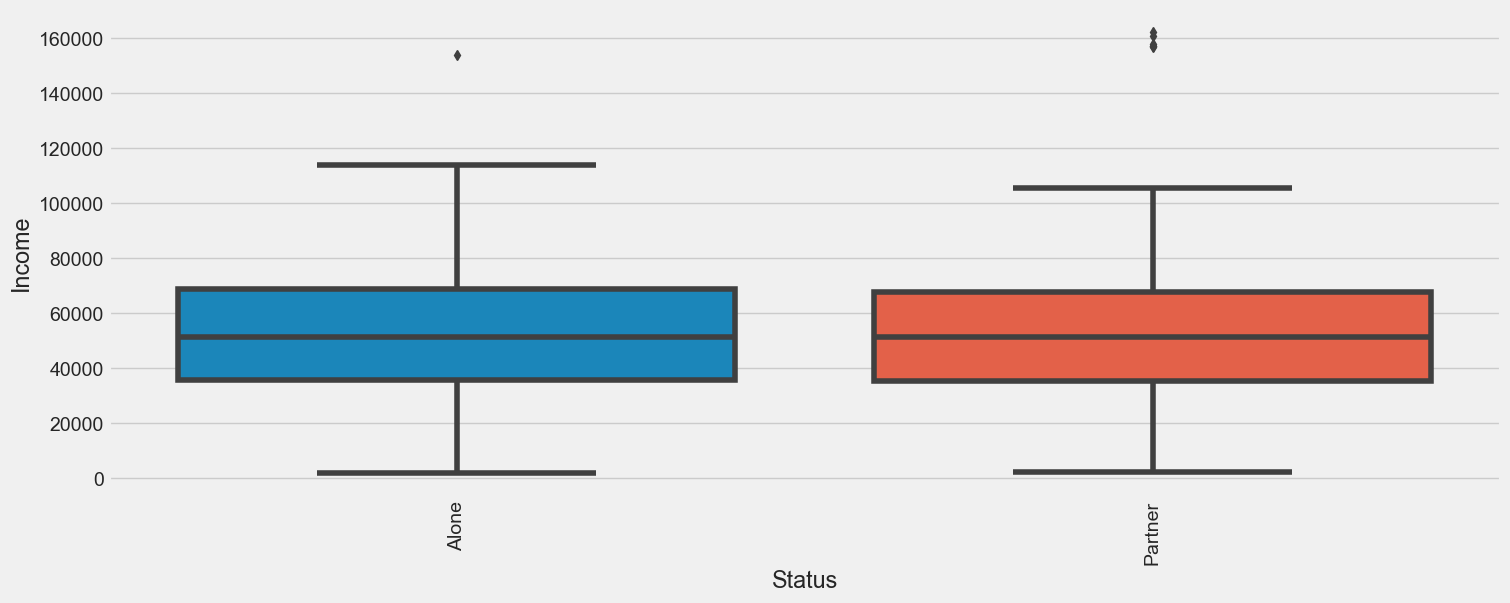

In [31]:
compare_qual_quan(data, 'Status', 'Income')

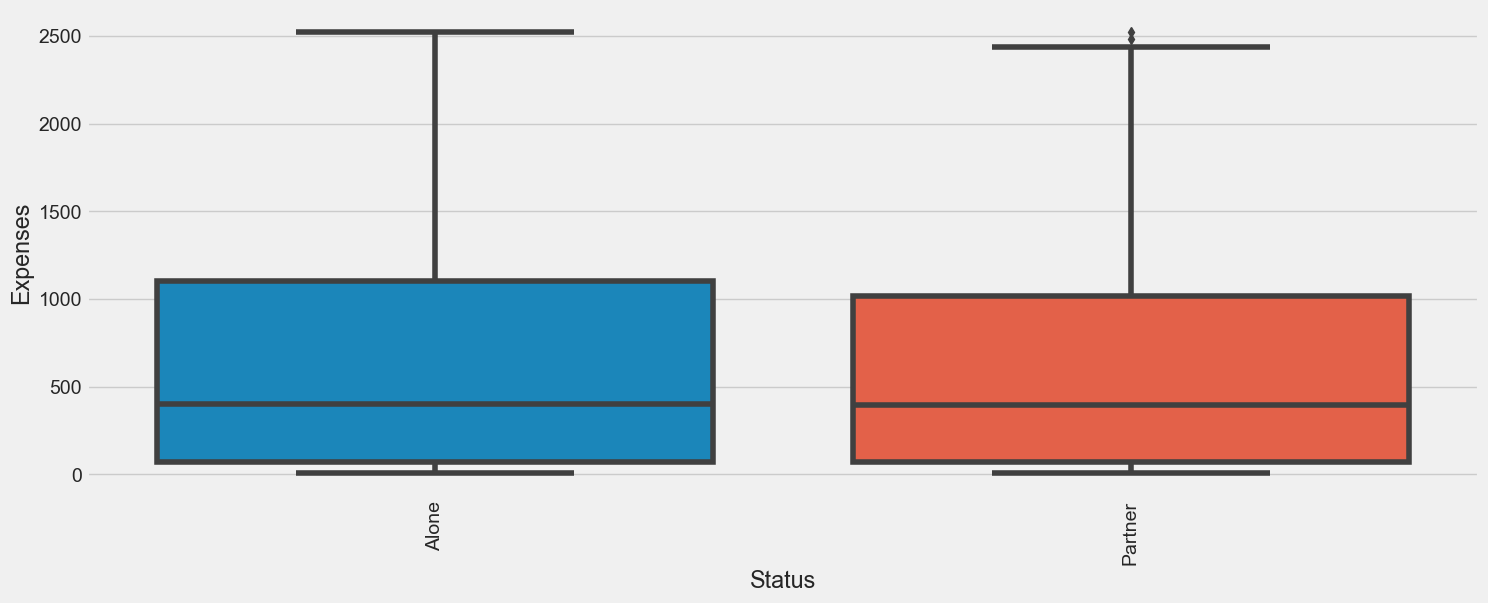

In [32]:
compare_qual_quan(data, 'Status', 'Expenses')

There is no significance difference between Single Parents and Partners with respect to spending and income. However, there exist a strong positive correlation between income and expenses 

There exist no statistically significance difference between almost all the educational status, with the exception of Basic, where they spend very low and also has low income 

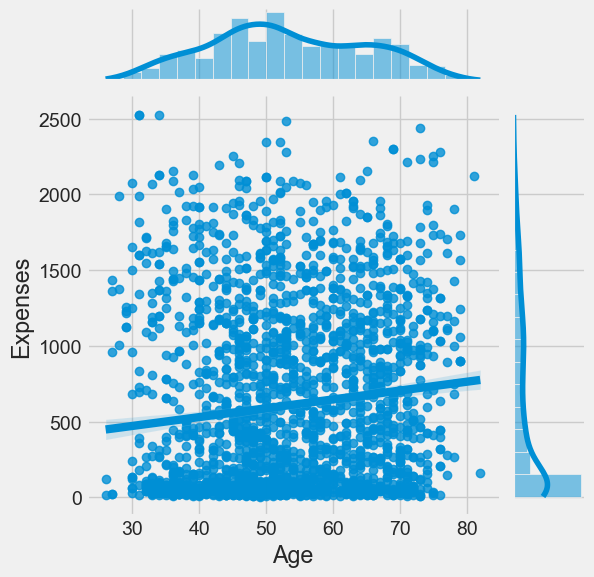

In [33]:
#Is there a relationship between age and spending
import scipy.stats as stats
r1 = sns.jointplot(x="Age",y="Expenses", data=data, kind="reg")
#r1.annotate(stats.pearsonr)
plt.show()

There seems to be no relationship between age and spending pattern

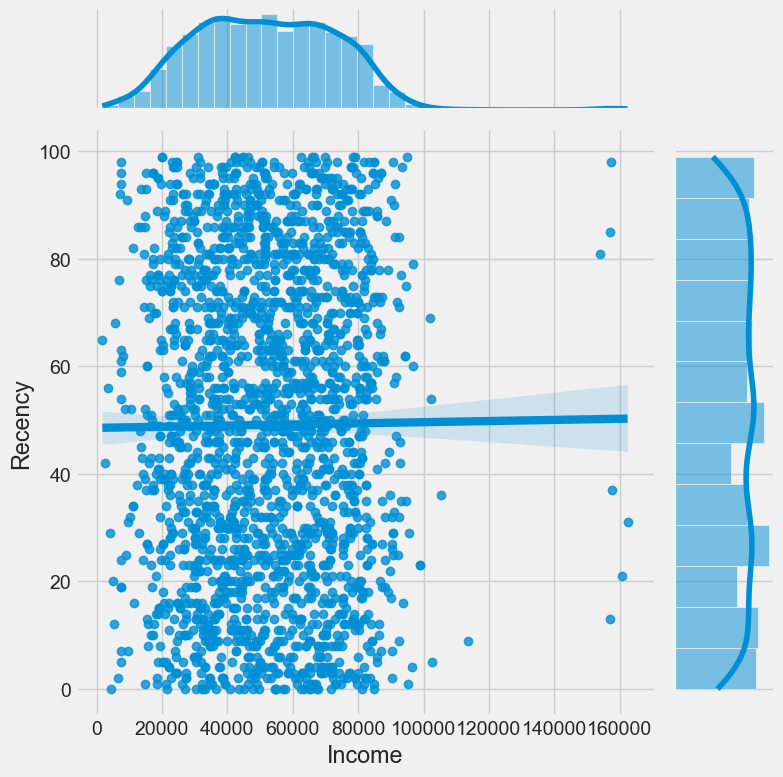

In [34]:
import scipy.stats as stats


r1 = sns.jointplot(x="Income",y="Recency", data=data, kind="reg", height=8)
plt.show()

No relationship between Income and recency

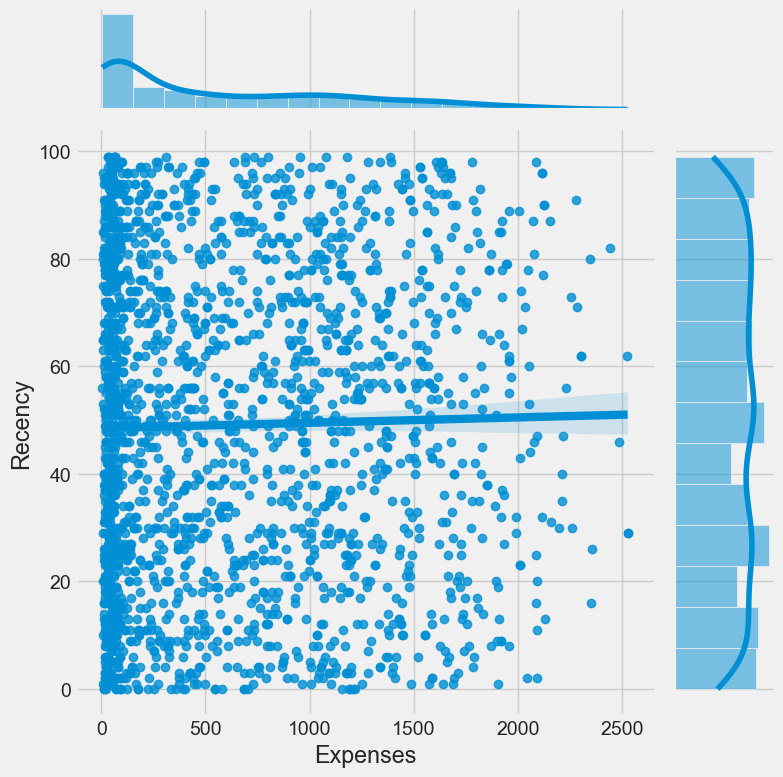

In [35]:
import scipy.stats as stats
r1 = sns.jointplot(x="Expenses",y="Recency", data=data, kind="reg", height=8)
#stats.pearsonr
plt.show()

**Multivariate analysis**

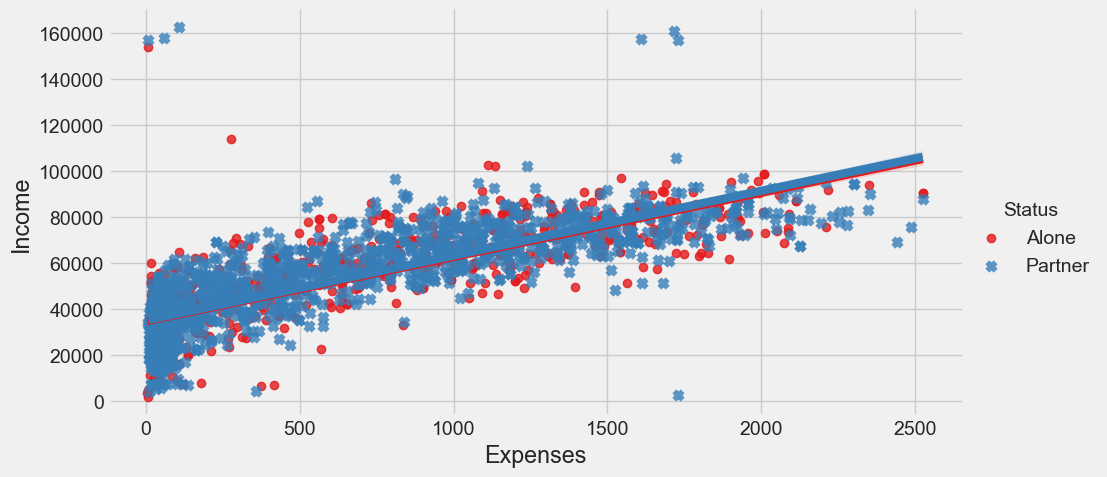

In [36]:
#is there a difference in spending habit and Income among living status
g=sns.lmplot(x="Expenses",y="Income", hue='Status', data=data, palette="Set1", aspect=2, markers=["o", "x"])
plt.show()

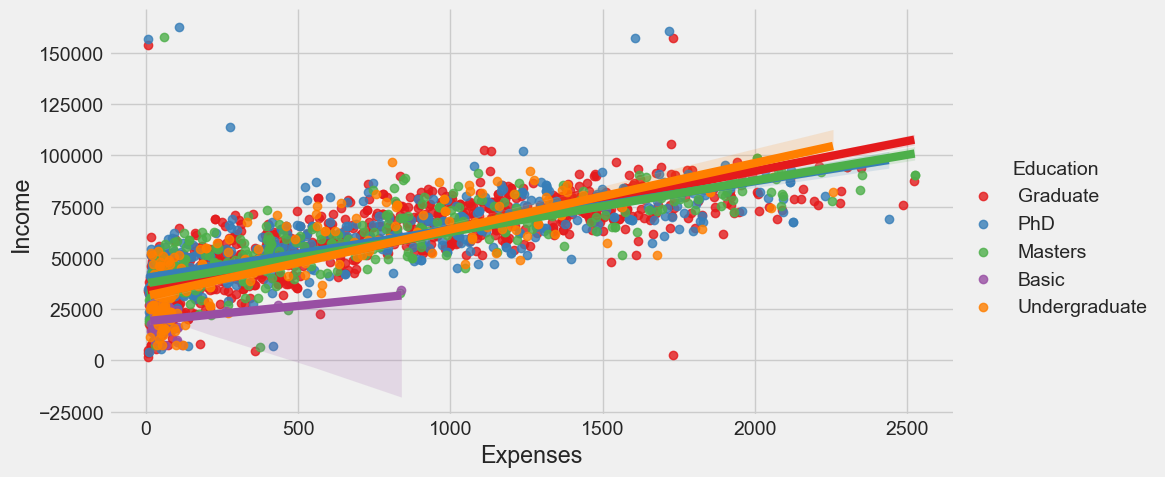

In [37]:
#is there a difference in spending habit and Income among education status
sns.lmplot(x="Expenses",y="Income", hue='Education', data=data, palette="Set1", aspect=2)
plt.show()

In [38]:
#getting only numerical variables
numerical=data.select_dtypes(include=np.number)

# Data-Preeprocessing

Data preprocessing is a step in the data mining and data analysis process that takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning.
here I will employ:
- Label encoding the categorical features
- Scaling the features using the standard scaler
- perform dimensionality reduction (PCA)

In [39]:
#seelct only categorical variables from the data 
cats=data.select_dtypes(include=object)
cats.head()

Education   Status
0  Graduate    Alone
1  Graduate    Alone
2  Graduate  Partner
3  Graduate  Partner
4       PhD  Partner

In [40]:
#using the label encoder to encode all categorical variables 
le=LabelEncoder()
for cat in cats:
    data[cat] = data[[cat]].apply(le.fit_transform)
    

Now all categorical features has been converted to numerical

In [41]:
#Creating a copy of data
df = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#dropping off columns from the data specifically deals accepted and promotions features
drop_it = ['AcceptedCmp3', 'AcceptedCmp4', 'Customer_In', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',
           'Customer_In', 'Complain', 'Response']
df.drop(drop_it, axis=1, inplace=True)

In [42]:
#scaling the data with standard scaler 
scaler = StandardScaler()
scaler.fit(df)
sc_data=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

KMeans clustering requires the data to be normally distributed in order to work well.

This means data needs to scaled (normalized) if it is not normal.

In [43]:
#having a look at the scaled data 
sc_data.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.786912  0.288947 -0.824939 -0.930615  0.306856  0.983228  1.554170   
1  -0.786912 -0.262003  1.032627  0.905974 -0.383971 -0.871064 -0.636431   
2  -0.786912  0.918423 -0.824939 -0.930615 -0.798467  0.362159  0.572177   
3  -0.786912 -1.182183  1.032627 -0.930615 -0.798467 -0.871064 -0.560893   
4   1.076016  0.296187  1.032627 -0.930615  1.550344 -0.389661  0.421101   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.679746  2.461068  1.475396  ...             2.509801          -0.552429   
1 -0.713455 -0.650414 -0.631638  ...            -0.568970          -1.167738   
2 -0.177201  1.344595 -0.147262  ...            -0.226884           1.293496   
3 -0.651409 -0.503991 -0.583200  ...            -0.911056          -0.552429   
4 -0.217088  0.154911 -0.001950  ...             0.115201           0.062879   

   NumWebVisitsMonth       Age  Children    Parent    Status  Expenses  \
0           0.692865  1.016868 -1.264308 -1.584362 -1.347635  1.680176   
1          -0.131421  1.273264  1.395139  0.631169 -1.347635 -0.962202   
2          -0.543564  0.333146 -1.264308 -1.584362  0.742041  0.282541   
3           0.280722 -1.290693  0.065416  0.631169  0.742041 -0.918994   
4          -0.131421 -1.034298  0.065416  0.631169  0.742041 -0.305762   

   Purchases  Promotions  
0   1.319340   -0.438933  
1  -1.155857   -0.438933  
2   0.798246   -0.438933  
3  -0.895310   -0.438933  
4   0.537699   -0.438933  

[5 rows x 23 columns]

# Dimensionality-Reduction

Dimensionality Reduction is the technique of reducing the number of random variables under consideration by generating a set of primary variables

The more features there are, the more challenging it is to use to make predictions. Many of these characteristics are redundant since they are highly correlated. For this reason, before running the features through a classifier, I will conduct dimensionality reduction on them.

By reducing the number of features, we’re improving the performance of our algorithm. On top of that, by decreasing the number of features the noise is also reduced.

Principal component analysis (PCA) is a technique for reducing the dimensionality of data, increasing interpretability but at the same time minimizing information loss.

In [44]:
pca=PCA()
pca.fit(sc_data)

PCA()

In [45]:
#i am chosing 3 components to perform pca
pca = PCA(n_components=3, random_state=42)
#fitting the model with our selected number of components 
pca.fit(sc_data)
#We need only the calculated resulting components scores for the elements in our data set
pca_data=pd.DataFrame(pca.transform(sc_data))

print(" number of features= ",len(pca_data.columns))

 number of features=  3


We’ll incorporate the newly obtained PCA scores in the K-means algorithm. That's how we can perform segmentation based on principal components scores instead of the original features.

In [46]:
#having a look at the Principal Components
pca_data

0         1         2
0     4.672317 -0.336669  1.417063
1    -3.066476  0.248293 -1.205460
2     2.500643 -0.858718  0.010927
3    -2.859082 -1.323050  1.167621
4    -0.367070  0.463350  1.242423
...        ...       ...       ...
2231  2.505127  1.691315  1.138548
2232 -1.701407  4.177366 -0.114658
2233  2.434991 -1.428410  0.430173
2234  1.928764  1.584763 -1.176110
2235 -2.456895  1.360276 -1.191586

[2236 rows x 3 columns]

# Clustering

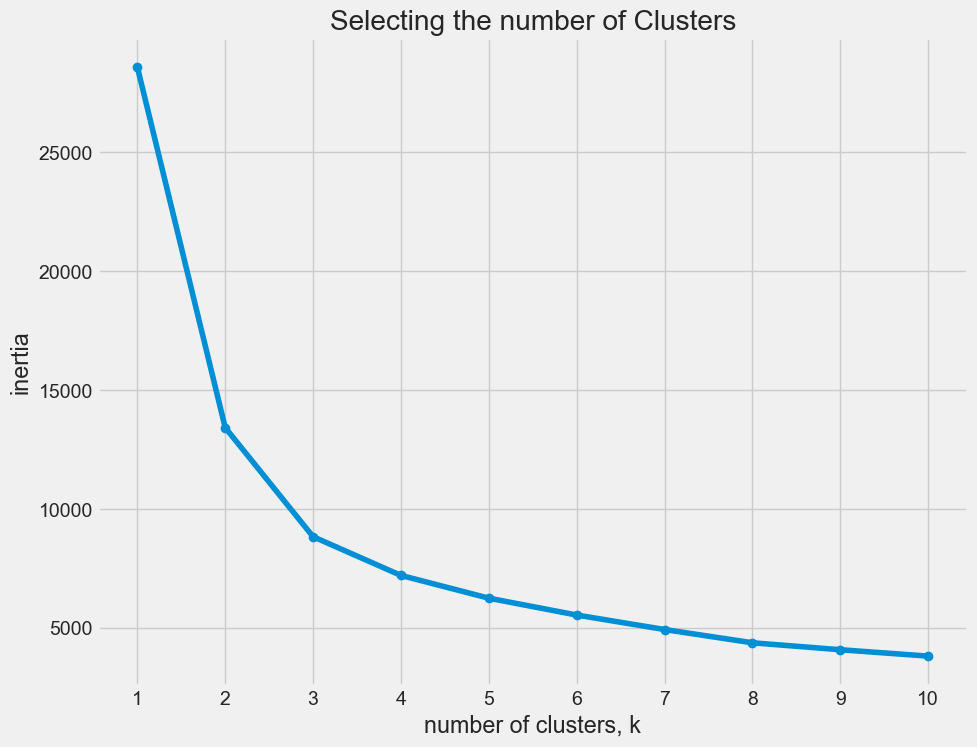

In [47]:
plt.figure(figsize=(10,8))
#chosing the best k for segmentation
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    
    # Fit model to samples
    model.fit(pca_data)
    
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Selecting the number of Clusters')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3. At point 4, the reduction becomes small (almost insignificant).

The plot above shows that inertia decreases with increasing number of clusters.

In [48]:
# Create a KMeans model with 3 clusters: 
model = KMeans(n_clusters=4, random_state=42, init='k-means++')
# Use fit_predict to fit model and obtain cluster labels
labels = model.fit_predict(pca_data)
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= labels

In [49]:
# we add a new dataframe with the original features and add the PCA scores and assigned clusters 
new_df = pd.concat([data.reset_index(drop=True), pd.DataFrame(pca_data)], axis=1)
#creating three columns at the far ends of the data indicating the pricipal components
new_df.columns.values[-3: ] = ['PC1', 'PC2', 'PC3']
#the last columns contains the pca k-means clustering labels 
new_df['K Means PCA'] = model.labels_
new_df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          1  58138.0        0         0       58    635      88   546   172   
1          1  46344.0        1         1       38     11       1     6     2   
2          1  71613.0        0         0       26    426      49   127   111   
3          1  26646.0        1         0       26     11       4    20    10   
4          3  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Status  Customer_In  Expenses  Purchases  Promotions  \
0      88  ...       0    3848 days      1617         25           0   
1       1  ...       0    3002 days        27          6           0   
2      21  ...       1    3349 days       776         21           0   
3       3  ...       1    2942 days        53          8           0   
4      27  ...       1    3198 days       422         19           0   

   Clusters       PC1       PC2       PC3  K Means PCA  
0         2  4.672317 -0.336669  1.417063            2  
1         3 -3.066476  0.248293 -1.205460            3  
2         2  2.500643 -0.858718  0.010927            2  
3         1 -2.859082 -1.323050  1.167621            1  
4         0 -0.367070  0.463350  1.242423            0  

[5 rows x 36 columns]

In [50]:
new_df['K Means PCA'].value_counts()

1    582
0    572
3    563
2    519
Name: K Means PCA, dtype: int64

In [51]:
#adding names of the segments to the label 
new_df['Cluster'] = new_df['K Means PCA'].map({0:'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'})

In [52]:
make_copy['Clusters'] = data['Clusters'].map({0:'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'})

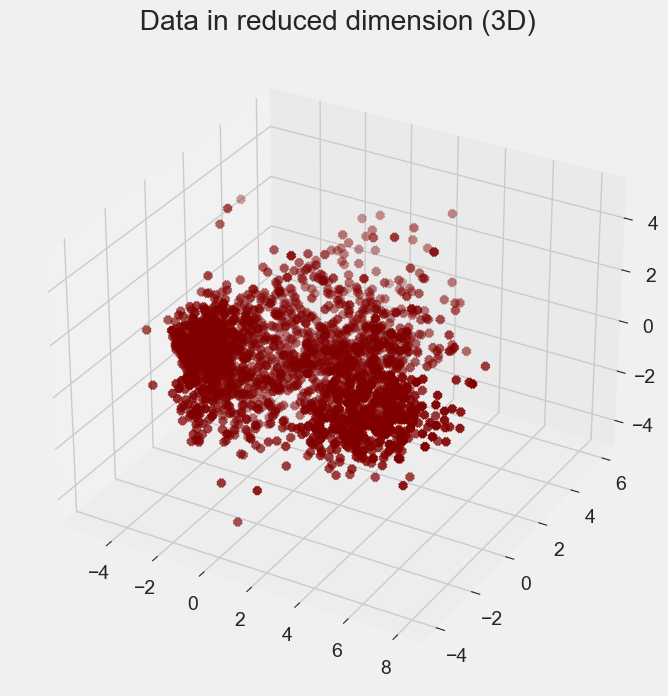

In [53]:
#So, let’s visualize the segments with respect to the components.
x =new_df["PC1"]
y =new_df["PC2"]
z =new_df["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="x")
ax.set_title(" Data in reduced dimension (3D)")
plt.show()


# Cluster-Analysis
Here I am going to find the different cahracterisristics of each cluster. studying the patterns in the clusters formed and determine the nature of the clusters' patterns. I will deploy EDA to get a better view of our customers 


In [54]:
new_df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          1  58138.0        0         0       58    635      88   546   172   
1          1  46344.0        1         1       38     11       1     6     2   
2          1  71613.0        0         0       26    426      49   127   111   
3          1  26646.0        1         0       26     11       4    20    10   
4          3  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Customer_In  Expenses  Purchases  Promotions  Clusters  \
0      88  ...    3848 days      1617         25           0         2   
1       1  ...    3002 days        27          6           0         3   
2      21  ...    3349 days       776         21           0         2   
3       3  ...    2942 days        53          8           0         1   
4      27  ...    3198 days       422         19           0         0   

        PC1       PC2       PC3  K Means PCA    Cluster  
0  4.672317 -0.336669  1.417063            2  Cluster 3  
1 -3.066476  0.248293 -1.205460            3  Cluster 4  
2  2.500643 -0.858718  0.010927            2  Cluster 3  
3 -2.859082 -1.323050  1.167621            1  Cluster 2  
4 -0.367070  0.463350  1.242423            0  Cluster 1  

[5 rows x 37 columns]

In [55]:
total = float(len(new_df))

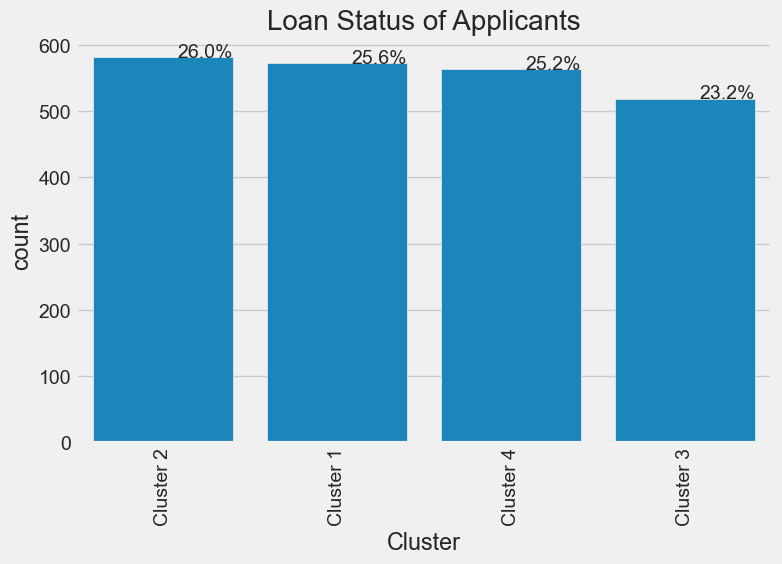

In [56]:
plt.figure(figsize=(8,5))
order=new_df['Cluster'].value_counts().index
ax = sns.countplot(x="Cluster", data=new_df, order=order, color = sns.color_palette()[0])
plt.title('Loan Status of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)
plt.show()

From the chart, most of the customers are coming from Cluster 2

**Age Distribution of customers**

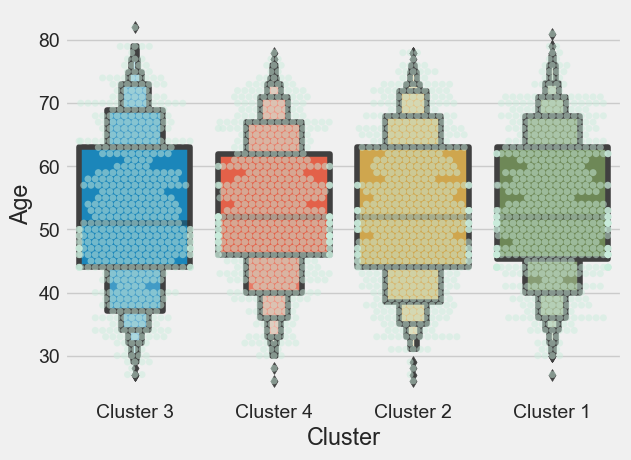

In [57]:
plt.figure()
pl=sns.swarmplot(x=new_df["Cluster"], y=data["Age"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=new_df["Cluster"], y=data["Age"]) #palette=pal)
plt.show()


Age is evenly ditributed among the various clusters

**Education Level of Customers**

<AxesSubplot:xlabel='Cluster'>

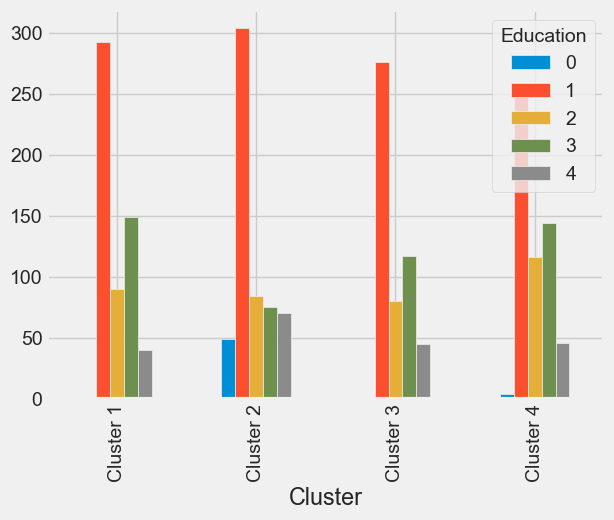

In [58]:
#Education Level
pd.crosstab(new_df['Cluster'], new_df['Education']).plot.bar()

**Income Distribution by cluster**

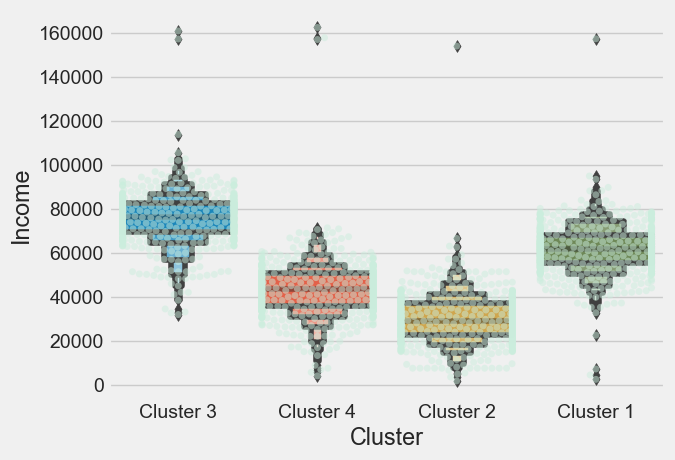

In [59]:
#Income Distribution by cluster
plt.figure()
sns.swarmplot(x=new_df["Cluster"], y=new_df["Income"], color= "#CBEDDD", alpha=0.5 )
sns.boxenplot(x=new_df["Cluster"], y=new_df["Income"]) #palette=pal)
plt.show()

1. Cluster 1: Quite an Average Income 
2. Cluster 2: Low Income 
3. Cluster 3: Highest Income
4. Cluster 4: third most high income customers 

**spending distribution by cluster**

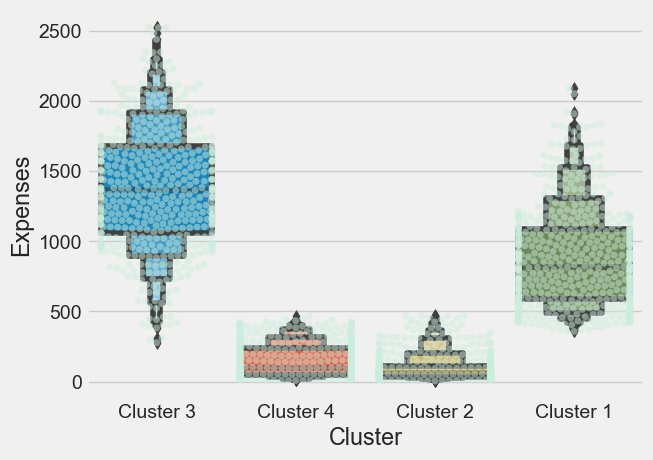

In [60]:
#spending distribution by cluster 
plt.figure()
pl=sns.swarmplot(x=new_df["Cluster"], y=new_df["Expenses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=new_df["Cluster"], y=new_df["Expenses"]) #palette=pal)
plt.show()

1. Cluster 1: Quite Average expenses
2. Cluster 2: Very Low Spending
3. Cluater 3: Highest spending
4. Cluster 4: Very low spending

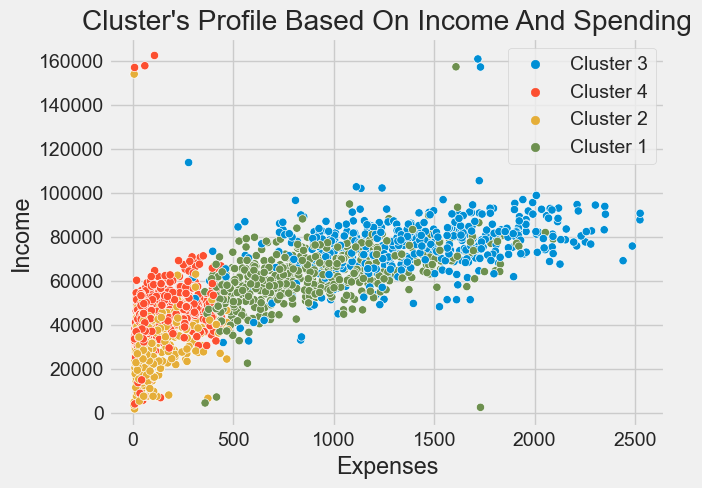

In [61]:
pl = sns.scatterplot(data = data,x=new_df["Expenses"], y=new_df["Income"],hue=new_df["Cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* Cluster 1: Avearge spending and income 
* Cluster 2: Low income and spending
* Cluster 3: high spending high income
* Cluster 4: Low spending but a moderte Income 

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

**Recency by Cluster**

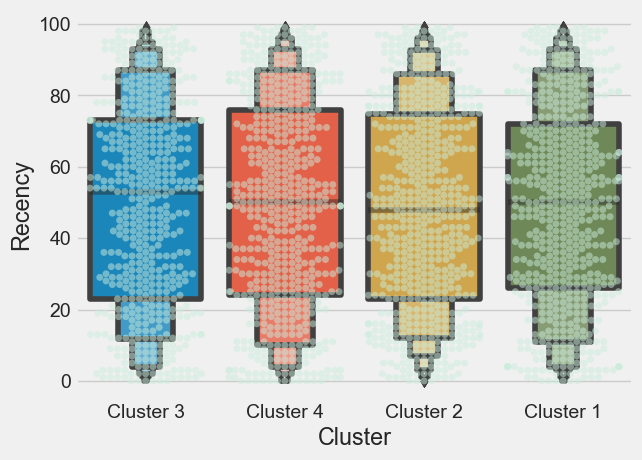

In [62]:
plt.figure()
pl=sns.swarmplot(x=new_df["Cluster"], y=new_df["Recency"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=new_df["Cluster"], y=new_df["Recency"]) #palette=pal)
plt.show()

Cluster 0 and 2 has the highest recency, Cluster 1 and 3 has almost the same fairly recency

**Family Size**

In [63]:
#writing a function to visualize the realtionship between qualitative and quantitative variables
def compare_qual_quan(data, x, y):
    
    """ This functions plots a box plot to visualize how a qualitative 
     variable relates with a quantitative variable
    """
    pd.crosstab(new_df[x], new_df[y]).plot.bar()
    plt.title('Relationship Between {} and {} '.format(x, y))
    #sns.swarmplot(new_df[x], new_df[y])
    plt.xticks(rotation=90)

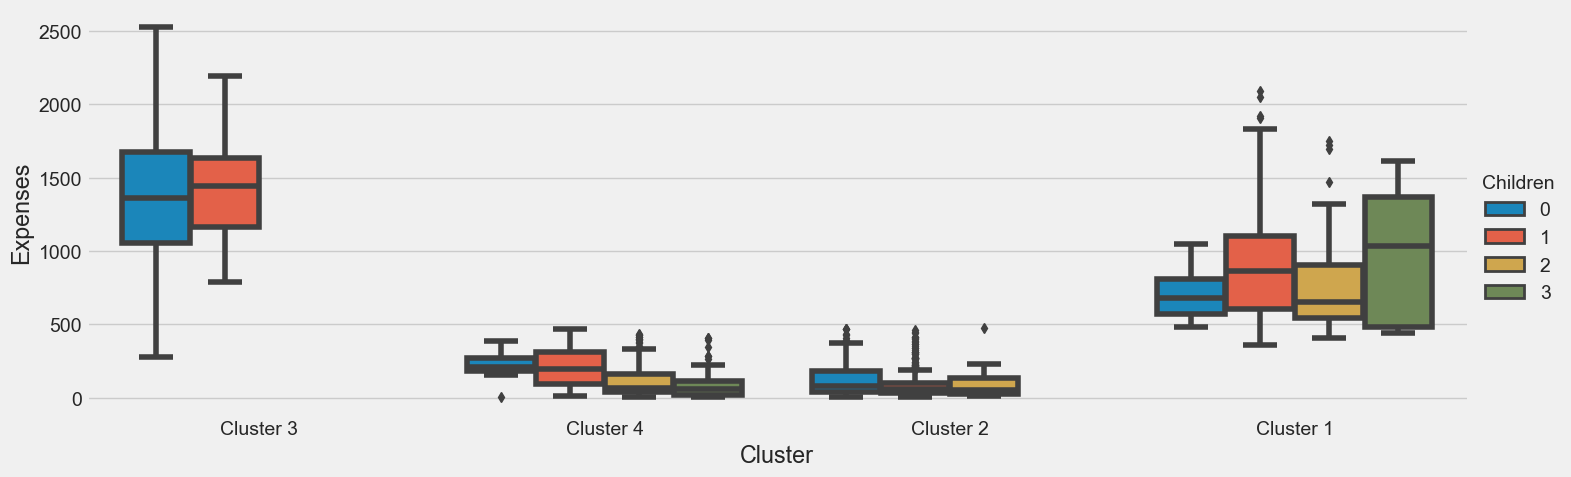

In [64]:
sns.factorplot(data=new_df, x='Cluster', y='Expenses', 
               hue='Children',  
               kind='box', legend=True, aspect=3)

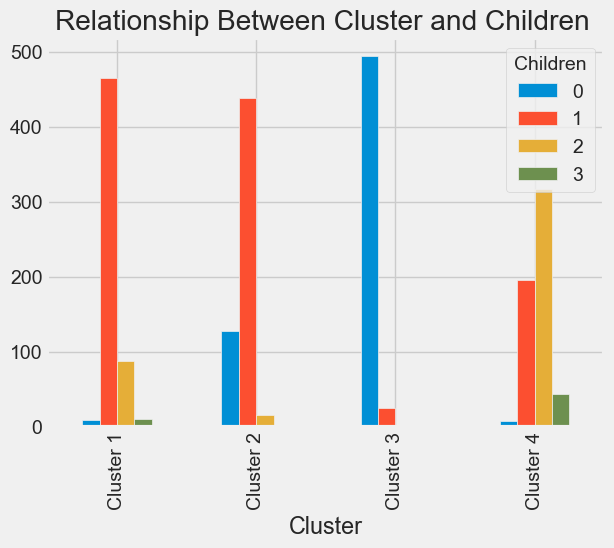

In [65]:
#Education Level
#pd.crosstab(new_df['Cluster'], new_df['Children']).plot.bar(figsize=(8,6));
compare_qual_quan(new_df, 'Cluster', 'Children')


- Cluster 1: Majority of the customers has one child, followed by 2 children 
- Cluster 2: The majority of customers have one child followed by no kid.
- Cluster 3: Most of the customers here has no children
- Cluster 4: Most customers have 2 children or a child 



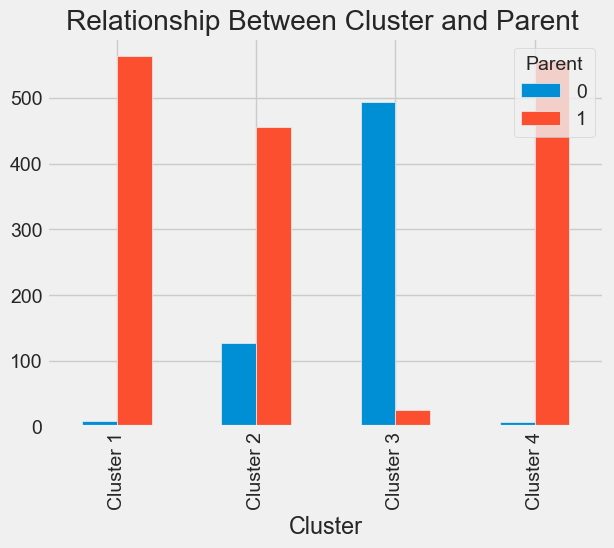

In [66]:
#Education Level
compare_qual_quan(new_df, 'Cluster', 'Parent')


- Cluster 1: have roughly all customers who have partners 
- Cluster 2: has some more customers who have partners. A few are single 
- Cluster 3: Mostlysingle customers
- Customer 4: mostly consist of customers with partners 


**Spendings on Products by Cluster**

<Figure size 640x480 with 0 Axes>

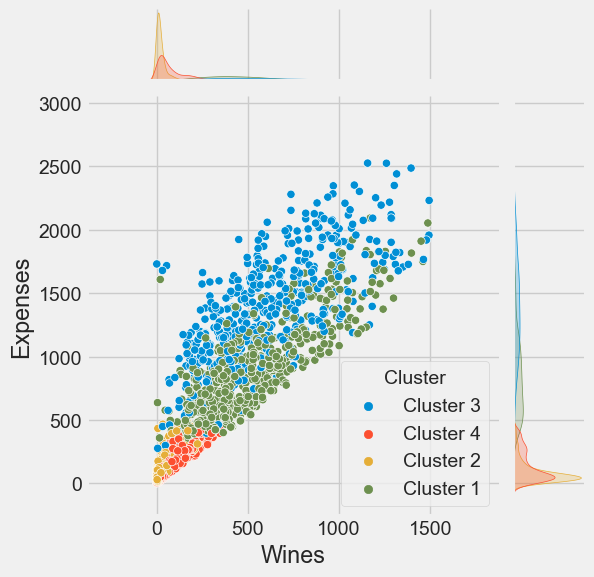

<Figure size 640x480 with 0 Axes>

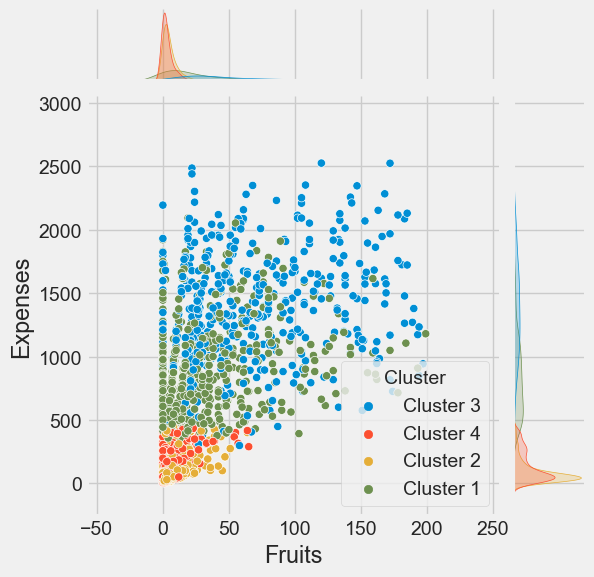

<Figure size 640x480 with 0 Axes>

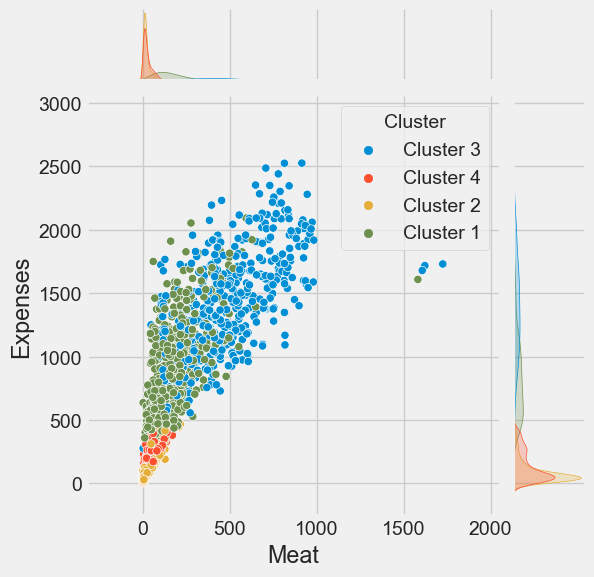

<Figure size 640x480 with 0 Axes>

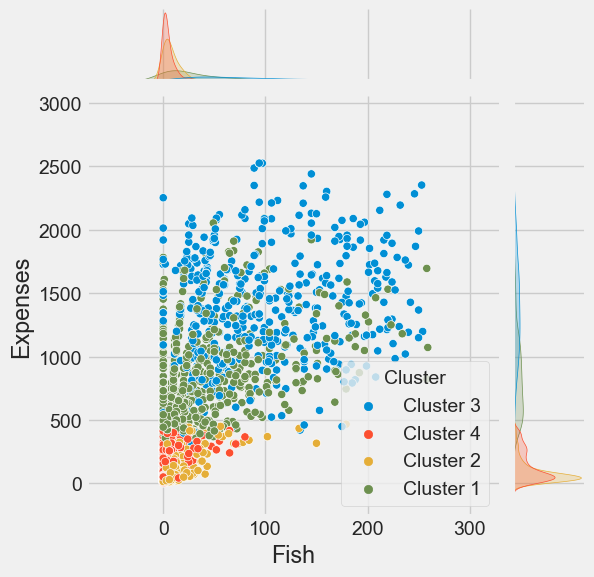

<Figure size 640x480 with 0 Axes>

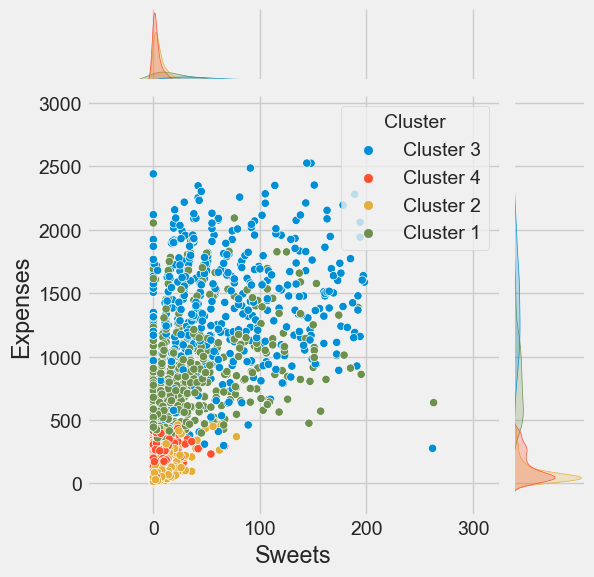

<Figure size 640x480 with 0 Axes>

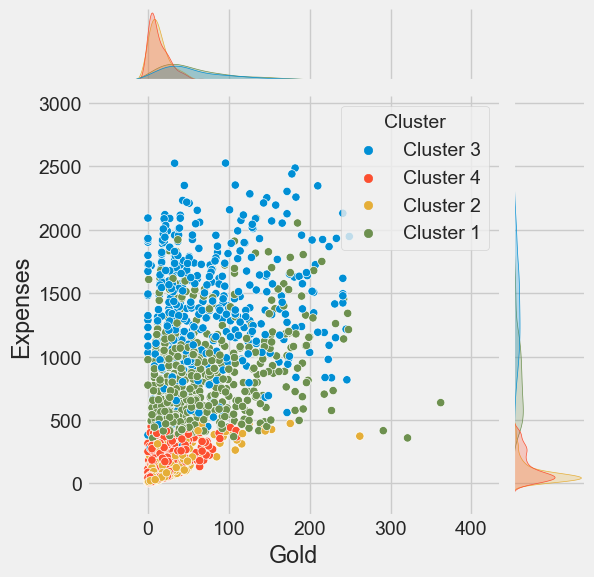

In [67]:
#for more details on the purchasing style 
products =['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'] 

for i in products:
    plt.figure()
    sns.jointplot(x=new_df[i],y = new_df["Expenses"],hue=new_df["Cluster"])
    plt.show()

1. Cluster 1: average spending on all products
2. Cluster 1: very low spending on all products 
3. Cluster 3: High spending on meats, fish, gold and sweets
4. Cluster 4: Failry lower spending on all products

**Purchases by Cluster**

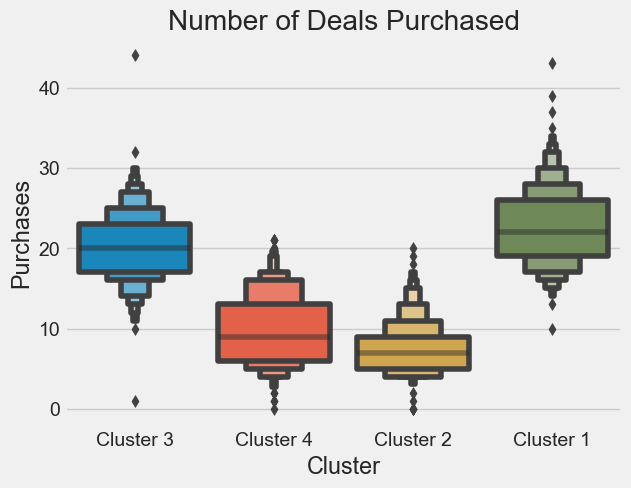

In [68]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=new_df["Purchases"],x=new_df["Cluster"])
pl.set_title("Number of Deals Purchased")
plt.show()

- Cluster 1: High Purchases 
- Cluster 2: Very low Purchases 
- Cluster 3: Quitehigh Purchases 
- Cluster 3: fairly low purchases

- Cluster 1: Average purchases and average spendings.
- Cluster 2: Low purchases and spending 
- Cluster 3: Relatively higher spendings, meaning that they buy more expensive products.
- Cluster 4: Low purchases and spending 

**Who are our Customers**

<Figure size 640x480 with 0 Axes>

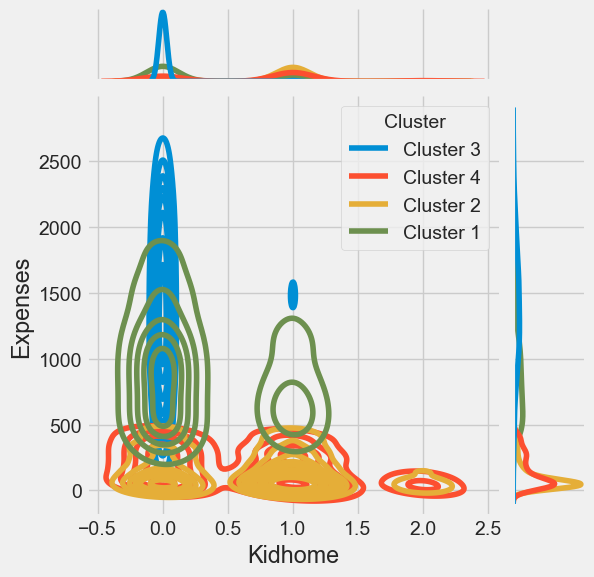

<Figure size 640x480 with 0 Axes>

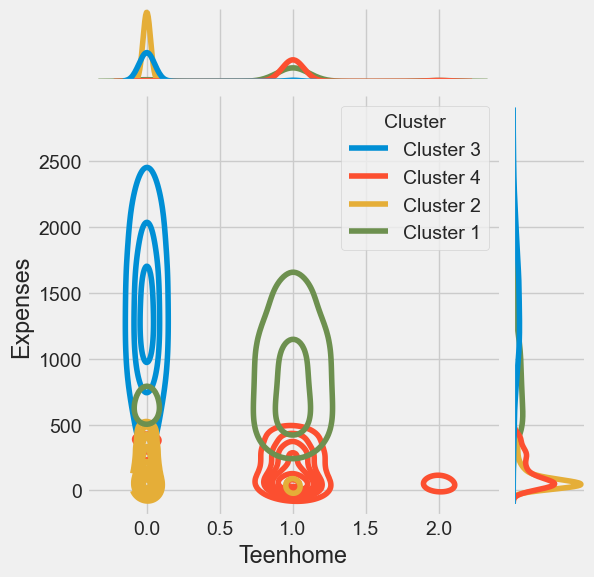

<Figure size 640x480 with 0 Axes>

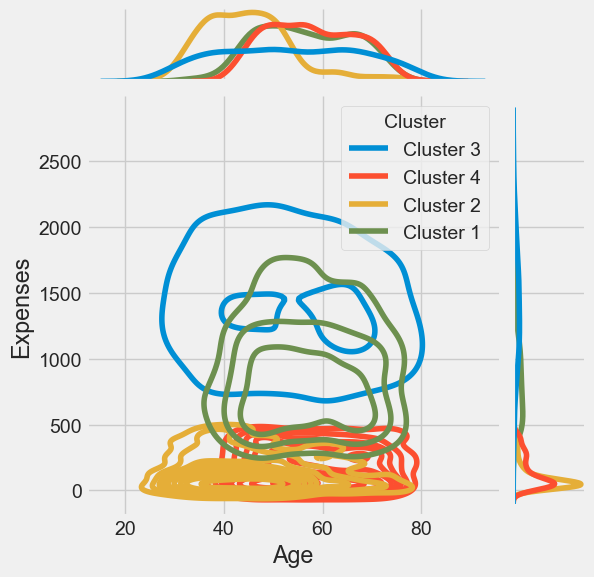

<Figure size 640x480 with 0 Axes>

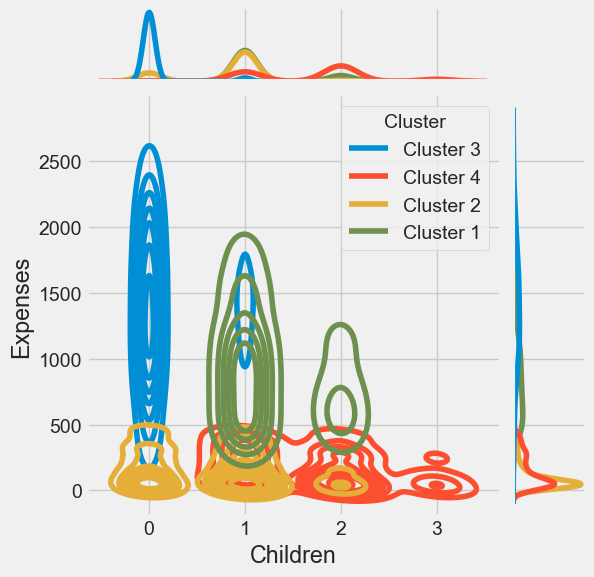

<Figure size 640x480 with 0 Axes>

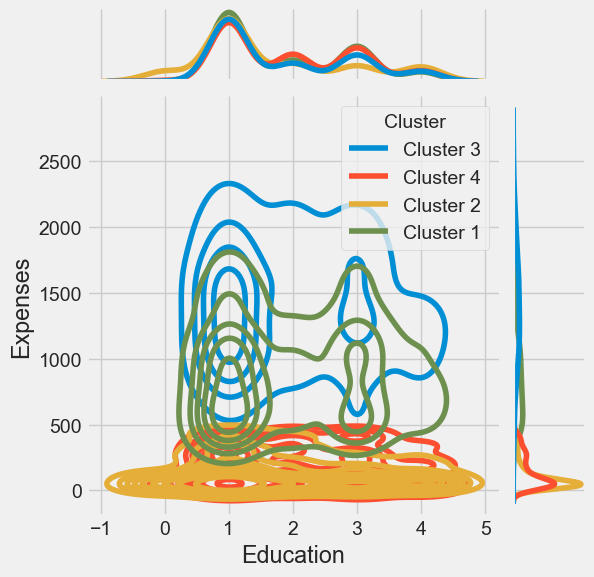

In [69]:
#demography distribution
demo = [ "Kidhome","Teenhome", "Age", "Children", "Education"]

for i in demo:
    plt.figure()
    sns.jointplot(x=new_df[i], y=new_df["Expenses"], hue =new_df["Cluster"], kind="kde")
    plt.show()

# Conclusion

In [70]:
# from sklearn.metrics import silhouette_score
# print(f'Silhouette Score(n=2): {silhouette_score(new_df, labels)}')

In [71]:
new_df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          1  58138.0        0         0       58    635      88   546   172   
1          1  46344.0        1         1       38     11       1     6     2   
2          1  71613.0        0         0       26    426      49   127   111   
3          1  26646.0        1         0       26     11       4    20    10   
4          3  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Customer_In  Expenses  Purchases  Promotions  Clusters  \
0      88  ...    3848 days      1617         25           0         2   
1       1  ...    3002 days        27          6           0         3   
2      21  ...    3349 days       776         21           0         2   
3       3  ...    2942 days        53          8           0         1   
4      27  ...    3198 days       422         19           0         0   

        PC1       PC2       PC3  K Means PCA    Cluster  
0  4.672317 -0.336669  1.417063            2  Cluster 3  
1 -3.066476  0.248293 -1.205460            3  Cluster 4  
2  2.500643 -0.858718  0.010927            2  Cluster 3  
3 -2.859082 -1.323050  1.167621            1  Cluster 2  
4 -0.367070  0.463350  1.242423            0  Cluster 1  

[5 rows x 37 columns]

**Characteristics of Cluster 1 (moderate)**
- Makes up 25.54% of the total custumers. second largest group
- Fairly old customers
- Average spending and Income 
- High Recency (Number of days since customer's last purchase)
- mostly partners with one or two children 

**Characteristics of Cluster 2 (Low Class)**
- Makes up to 26.03% of the total customers
- Comprises of younger customers 
- Low income and expenses
- Low recency (Number of days since customer's last purchase)
- Mostly partners with 1 child

**Characteristics of Cluster 3 (First Class)**
- Makes up to 23.21% of the total customers
- fairly averaged aged customers 
- High income and spending
- High recency
- Mostly single customers with few of them with a child

**Characteristics of Cluster 4 (partners)**
- Makes up to 25.18% of the total customers
- fairly older customers 
- Low spending average income
- Low recency
- Mostly customers with partners with 1, 2 or 3 children

In [72]:
#saving the master data with all clusters 
make_copy.to_csv('Cluster.csv', index=False)

In [73]:
new_df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          1  58138.0        0         0       58    635      88   546   172   
1          1  46344.0        1         1       38     11       1     6     2   
2          1  71613.0        0         0       26    426      49   127   111   
3          1  26646.0        1         0       26     11       4    20    10   
4          3  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Customer_In  Expenses  Purchases  Promotions  Clusters  \
0      88  ...    3848 days      1617         25           0         2   
1       1  ...    3002 days        27          6           0         3   
2      21  ...    3349 days       776         21           0         2   
3       3  ...    2942 days        53          8           0         1   
4      27  ...    3198 days       422         19           0         0   

        PC1       PC2       PC3  K Means PCA    Cluster  
0  4.672317 -0.336669  1.417063            2  Cluster 3  
1 -3.066476  0.248293 -1.205460            3  Cluster 4  
2  2.500643 -0.858718  0.010927            2  Cluster 3  
3 -2.859082 -1.323050  1.167621            1  Cluster 2  
4 -0.367070  0.463350  1.242423            0  Cluster 1  

[5 rows x 37 columns]

In [74]:
#getting four daaframes for each cluster
moderate=new_df[new_df['Cluster']=='Cluster 1']
low_class=new_df[new_df['Cluster']=='Cluster 2']
first_class=new_df[new_df['Cluster']=='Cluster 3']
partners=new_df[new_df['Cluster']=='Cluster 4']

In [75]:
#converting all cluster data back to csv
moderate.to_csv('moderate_customers.csv', index=False)
low_class.to_csv('low_class_customers.csv', index=False)
first_class.to_csv('first_class_customers.csv', index=False)
partners.to_csv('partners_customers.csv', index=False)

In [76]:
pd.read_csv('Cluster.csv')


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...             0   
1            1  08-03-2014       38        11  ...             0   
2            0  21-08-2013       26       426  ...             0   
3            0  10-02-2014       26        11  ...             0   
4            0  19-01-2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  13-06-2013       46       709  ...             0   
2236         1  10-06-2014       56       406  ...             0   
2237         0  25-01-2014       91       908  ...             0   
2238         1  24-01-2014        8       428  ...             0   
2239         1  15-10-2012       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response   Clusters  
0                 3         11         1  Cluster 3  
1                 3         11         0  Cluster 4  
2                 3         11         0  Cluster 3  
3                 3         11         0  Cluster 2  
4                 3         11         0  Cluster 1  
...             ...        ...       ...        ...  
2235              3         11         0  Cluster 1  
2236              3         11         0  Cluster 1  
2237              3         11         0  Cluster 3  
2238              3         11         0  Cluster 1  
2239              3         11         1  Cluster 4  

[2240 rows x 30 columns]

In [77]:
from IPython.display import IFrame
Dashboard = IFrame(src="https://app.powerbi.com/reportEmbed?reportId=680ebe2f-09b6-44a0-9877-9f0f324d37e0&autoAuth=true&ctid=3e206185-4f99-4914-84a4-e6b637fafb25&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXdlc3QtZXVyb3BlLXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9", width = 1000, height = 600)
display(Dashboard)